In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib as plt
import matplotlib.pyplot as pyplt
import seaborn as sn
%matplotlib inline

In [2]:
import pandas
print (pandas.__version__)

1.1.3


In [3]:
inital_df = pd.read_csv('../dataset/heartdiseases.csv')
print("Data frame size: ", inital_df.shape)

Data frame size:  (1190, 12)


In [4]:
inital_df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [5]:
print("Data frame size: ", inital_df.shape)
print("Dependent variable value counts : ", 
      inital_df['target'].value_counts(dropna=False))

Data frame size:  (1190, 12)
Dependent variable value counts :  1    629
0    561
Name: target, dtype: int64


In [6]:
inital_df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


<AxesSubplot:>

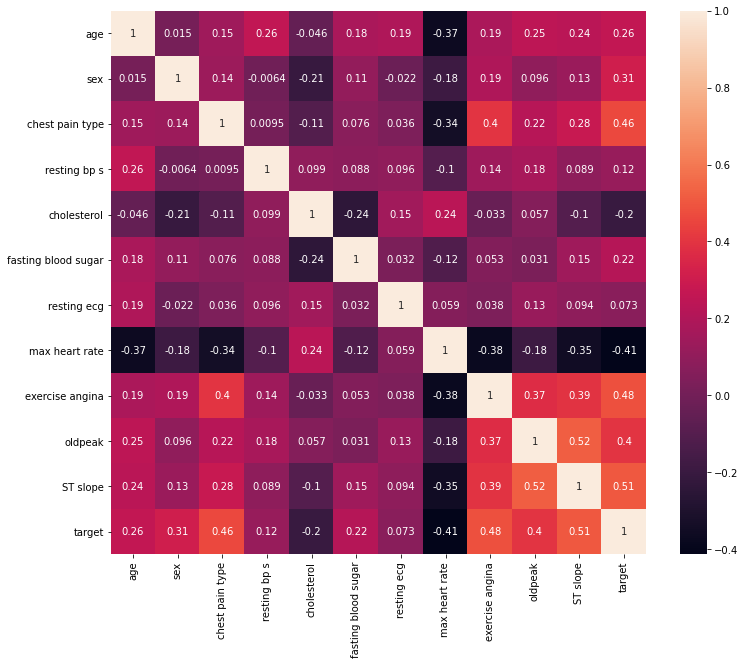

In [7]:
pyplt.figure(figsize = (12,10))
sn.heatmap( inital_df.corr(), annot = True )

In [8]:
inital_df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [9]:
inital_df.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [10]:
X = inital_df.loc[:, inital_df.columns != 'target']
Y = inital_df['target']

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [12]:
# Split the data into 40% test and 60% training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
model = RandomForestClassifier()

## Initializing the Random Forest Model with the optimal values 
model = RandomForestClassifier(max_depth=20, n_estimators=15)

## Fitting the model with the training set 
model.fit( X_train, Y_train )

RandomForestClassifier(max_depth=20, n_estimators=15)

In [14]:
inital_df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [15]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

In [16]:
feature_descriptions = {'age': 'Patient Age in years', 
                        'sex': 'Patient Gender Male as 1 Female as 0 ', 
                        'chest pain type': 'Type of chest pain categorized', 
                        'resting bp s': 'Level of blood pressure at resting mode',
                        'cholesterol': 'Serum cholestrol',
                        'fasting blood sugar': 'Blood sugar levels on fasting', 
                        'resting ecg': 'result of electrocardiogram while at rest ', 
                        'max heart rate': 'Maximum heart rate achieved',
                        'exercise angina': 'Angina induced by exercise', 
                        'oldpeak': 'Exercise induced ST-depression', 
                        'ST slope': 'ST segment measured in terms of slope during peak exercise'
                       }

In [17]:
explainer = ClassifierExplainer(model, X_test, Y_test, 
                                descriptions=feature_descriptions, 
                                labels=['No Heart Risk', 'Heart Risk'])

Note: shap=='guess' so guessing for RandomForestClassifier shap='tree'...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...


In [18]:
db = ExplainerDashboard(explainer, 
                        title="Explainer", 
                        whatif=False, 
                        )

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating categorical permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating prediction probabilities...
Calculating pred_percentiles...
Calculating shap interaction values...
Generating ShadowDecTree for each individual decision tree...
Registering callbacks...


In [ ]:
db.run(port=8050, debug=False)

Starting ExplainerDashboard on http://localhost:8050
Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "explainerdashboard.dashboards" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [22/Jun/2022 13:33:25] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2022 13:33:25] "GET /assets/bootstrap.css?m=1607033308.0 HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2022 13:33:25] "GET /assets/stylesheet.css?m=1607033308.0 HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2022 13:33:25] "GET /_dash-component-suites/dash_renderer/react@16.v1_8_3m1604054361.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2022 13:33:25] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_8_3m1604054361.7.2.min.js HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2022 13:33:25] "GET /_dash-component-suites/dash_renderer/polyfill@7.v1_8_3m1604054361.8.7.min.js HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2022 13:33:25] "GET /_dash-component-suites/dash_renderer/react-dom@16.v1_8_3m1604054361.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2022 13:33:25] "GET /_dash-component-suites/dash_table/bundle.v4_11_0m1604056516.js HTTP/1.1" 200 -
127.0.0.1 - - [22/